In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt1
from datetime import datetime as dt
import pandas_profiling as pp
#from sklearn import preprocessing, cross_validation, svm
from sklearn import preprocessing, svm
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate,train_test_split
import math
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

C:\Users\Adarsh.r\AppData\Local\anaconda3\envs\pdh\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use(BACKEND)


In [2]:
df_price=pd.read_csv("./prices.csv")
df_price.head()
# df_price.symbol.unique()


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [43]:
df=df_price.loc[df_price['symbol'] == 'CSCO']
print(df.shape)
# df.dropna(inplace=True)
# # print df.shape

(1762, 7)


In [44]:
forecast_col='close'
df.fillna(value=-99999, inplace=True) #to update df
forecast_out = int(math.ceil(0.01 * len(df))) #to forecast data based on 0.01*len(df) days approx 1800*0.01(ceil=largest int)
print(forecast_out)
df['label'] = df[forecast_col].shift(-forecast_out)#shift upwards with null values which is to be removed
print(df.shape)

18
(1762, 8)


C:\Users\Adarsh.r\AppData\Local\anaconda3\envs\pdh\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\Adarsh.r\AppData\Local\anaconda3\envs\pdh\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [45]:
feature_labels = np.array(['date', 'symbol', 'open', 'close', 'low', 'high', 
                           'volume'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

low-1.40%
date-9.03%
symbol-9.73%
open-20.87%
close-58.97%


In [46]:
X=np.array(df.drop(['label','symbol','date'], axis=1))
#print(X)
print ("df",df.shape)
X = preprocessing.scale(X)

X_lately = X[-forecast_out:]#get values from last to forecastout last 18 from right to left
print(X_lately.shape)
X = X[:-forecast_out]#first(r->) to -forcst,remove elements fromlast to forecat value/get first elemnts to frecast
print("X",X.shape)
df.dropna(inplace=True)#after shiting null values are appended
df.drop('low',axis=1,inplace=True)
print(df.shape)
y = np.array(df['label'])
print("ss",y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

df (1762, 8)
(18, 5)
X (1744, 5)
(1744, 7)
ss (1744,)


C:\Users\Adarsh.r\AppData\Local\anaconda3\envs\pdh\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Adarsh.r\AppData\Local\anaconda3\envs\pdh\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [47]:
clf = LinearRegression(n_jobs=-1)
cross_val_score(clf, X_train, y_train, cv=10)

array([0.89279339, 0.90855149, 0.89999343, 0.89886575, 0.88364521,
       0.88703941, 0.84726502, 0.85801196, 0.8641139 , 0.88635069])

In [49]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
#x= average_precision_score(X_test, y_test)
print(confidence)

0.8884495740175103


In [50]:
y_pred = clf.predict(X_test)
print('Liner Regression R squared: %.4f' % clf.score(X_test, y_test))

Liner Regression R squared: 0.8884


In [51]:

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.8731


C:\Users\Adarsh.r\AppData\Local\anaconda3\envs\pdh\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)
print(model.score(X_test,y_test))

0.8879137336307246


[28.2210842  28.35141664 30.78365486 30.68537246 30.78348727 30.88697949
 30.58231536 30.88490053 30.52930484 30.91547711 30.87860449 30.87704721
 30.54410433 30.67885308 30.86759801 30.86652486 29.27211485 30.78365486]
<class 'str'>
<class 'float'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>


C:\Users\Adarsh.r\AppData\Local\anaconda3\envs\pdh\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Adarsh.r\AppData\Local\anaconda3\envs\pdh\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
                    date symbol  open  close  high  volume  label   Forecast
2016-12-19 00:00:00  NaN    NaN   NaN    NaN   NaN     NaN    NaN  30.678853
2016-12-20 00:00:00  NaN    NaN   NaN    NaN   NaN     NaN    NaN  30.867598
2016-12-21 00:00:00  NaN    NaN   NaN    NaN   NaN     NaN    NaN  30.866525
2016-12-22 00:00:00  NaN    NaN   NaN    NaN   NaN     NaN    NaN  29.272115
2016-12-23 00:00:00  NaN    NaN   NaN    NaN   NaN     NaN    NaN  30.783655


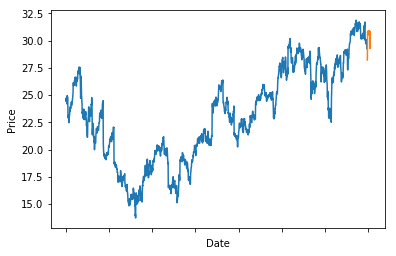

In [53]:
forecast_set = model.predict(X_lately)
print(forecast_set)
df['Forecast'] = np.nan
last_date = df.iloc[-1].date
print(type(last_date))
last_date=dt.strptime(last_date, '%Y-%m-%d').timestamp()
print(type(last_date))
last_unix = last_date
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = dt.fromtimestamp(next_unix)
    print(type(next_date))
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
print(df.tail())
df['close'].plot()
df['Forecast'].plot()
#plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()